In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


def set_plotstyle(width=7, height=17 * 3.35 / 16):
    os.environ['PATH'] = os.environ['PATH'] + "C:/Users/FischerVicto/AppData/Local/Programs/MiKTeX/miktex/bin/x64/"
    os.environ['PATH'] = os.environ['PATH'] + r"C:\Users\FischerVicto\AppData\Local\Programs\MiKTeX\miktex\bin\x64\mgs.exe"
    os.environ['PATH'] = os.environ['PATH'] + r"C:\Users\FischerVicto\AppData\Local\Programs\MiKTeX\miktex\bin\x64\mgsdll64.dll"
    os.environ['PATH'] = os.environ['PATH'] + "C:/Users/FischerVicto/AppData/Local/Programs/MiKTeX/"
    os.environ['PATH'] = os.environ['PATH'] + r"C:\Users\FischerVicto\AppData\Local\Programs\MiKTeX"

    os.environ['PATH'] = os.environ['PATH'] + r"C:/texlive/2023/bin/windows/"
    os.environ['PATH'] = os.environ['PATH'] + r"C:\Program Files\texstudio"
    os.environ['PATH'] = os.environ['PATH'] + "C:/Program Files/texstudio/"

    mpl.rcParams.update(mpl.rcParamsDefault)

    # for latex, you might need to change this
    label_size = 8
    # plt.style.use('fivethirtyeight')
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r'\usepackage{dsfont}\usepackage{amsmath}\usepackage{physics}')

    pr = {"axes.labelsize": 12,  # LaTeX default is 10pt font.
          "font.size": 12,
          "legend.fontsize": 12,  # Make the legend/label fonts
          "xtick.labelsize": 12,  # a little smaller
          "ytick.labelsize": 12,
          'figure.figsize': (width, height),
          "errorbar.capsize": 2.5,
          "font.family": "serif",
          "font.serif": [],  # blank entries should cause plots
          "font.sans-serif": [],
          }
    for k, v in pr.items():
        mpl.rcParams[k] = v

    mpl.rcParams["font.family"] = "serif"
    # mpl.rcParams["font.serif"] = ["STIX"]
    mpl.rcParams["mathtext.fontset"] = "stix"


### Load the data

In [183]:
df_su2 = pd.read_csv(f'Results/Results_SU(2)_TwoSite', index_col=[0]).iloc[7:]
df_su2 = df_su2.sort_values(by='n_sites')
df_sta = pd.read_csv(f'Results/Results_Standard_TwoSite', index_col=[0]).iloc[4:]
df_sta = df_sta.sort_values(by='n_sites')

In [184]:
df_su2

,n_sites,n_lanczos,tol,abort,number_steps,energy,runtime,initial_paras,post_opt_paras
14,4,5,1.000000e-08,0.0001,12,-1.616025,3.903861,24,6
13,8,5,1.000000e-08,0.0001,28,-3.374933,24.250301,150,44
12,12,5,1.000000e-08,0.0001,44,-5.142091,87.293307,348,168
7,16,5,1.000000e-08,0.0001,60,-6.911737,172.732468,1710,332
8,20,5,1.000000e-08,0.0001,76,-8.682473,302.053947,2660,594
9,24,5,1.000000e-08,0.0001,92,-10.453785,449.384270,3810,984
10,28,5,1.000000e-08,0.0001,108,-12.225440,625.955444,5160,1370
11,32,5,1.000000e-08,0.0001,124,-13.997315,828.950736,6710,1702
15,36,5,1.000000e-08,0.0001,140,-15.769340,1081.203357,8460,2190
16,40,5,1.000000e-08,0.0001,156,-17.541472,1499.735698,10410,2809


In [182]:
df_sta

,n_sites,n_lanczos,tol,abort,number_steps,energy,runtime,initial_paras,post_opt_paras
11,4.0,5.0,1.000000e-08,0.0001,10.0,-1.616025,0.022017,24.0,40.0
10,8.0,5.0,1.000000e-08,0.0001,26.0,-3.374933,1.621311,120.0,680.0
9,12.0,5.0,1.000000e-08,0.0001,42.0,-5.142091,24.292937,336.0,2856.0
4,16.0,5.0,1.000000e-08,0.0001,58.0,-6.911737,122.933833,1824.0,6024.0
5,20.0,5.0,1.000000e-08,0.0001,74.0,-8.682473,285.315617,2336.0,10484.0
6,24.0,5.0,1.000000e-08,0.0001,90.0,-10.453785,529.138468,3600.0,16920.0
7,28.0,5.0,1.000000e-08,0.0001,106.0,-12.225440,877.324545,5240.0,26172.0
8,32.0,5.0,1.000000e-08,0.0001,122.0,-13.997315,1498.355629,6040.0,35022.0
12,36.0,5.0,1.000000e-08,0.0001,138.0,-15.769340,2286.518279,8272.0,45776.0
13,40.0,5.0,1.000000e-08,0.0001,154.0,-17.541472,3317.388141,10992.0,58262.0


In [44]:
su2_runtime = df_su2['runtime'].to_numpy()
su2_nsites = df_su2['n_sites'].to_numpy()
su2_initial_paras = df_su2['initial_paras'].to_numpy()
su2_post_opt_paras = df_su2['post_opt_paras'].to_numpy()
su2_energy = df_su2['energy'].to_numpy()

sta_runtime = df_sta['runtime'].to_numpy()
sta_nsites = df_sta['n_sites'].to_numpy()
sta_initial_paras = df_sta['initial_paras'].to_numpy()
sta_post_opt_paras = df_sta['post_opt_paras'].to_numpy()
sta_energy = df_sta['energy'].to_numpy()

### Plotting

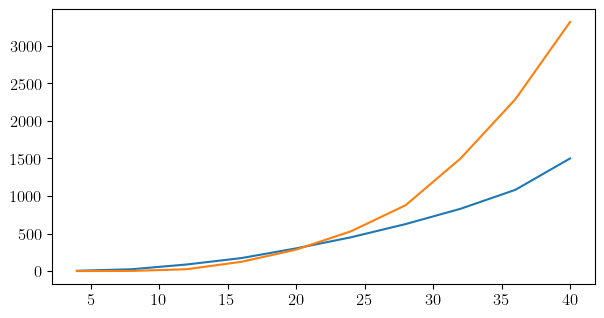

In [45]:
set_plotstyle()
plt.plot(su2_nsites, su2_runtime)
plt.plot(sta_nsites, sta_runtime)

# plt.yscale('log')
plt.show()

In [46]:
sta_post_opt_paras

array([4.0000e+01, 6.8000e+02, 2.8560e+03, 6.0240e+03, 1.0484e+04,
       1.6920e+04, 2.6172e+04, 3.5022e+04, 4.5776e+04, 5.8262e+04])

In [47]:
sta_nsites

array([ 4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.])

### Plot Runtime

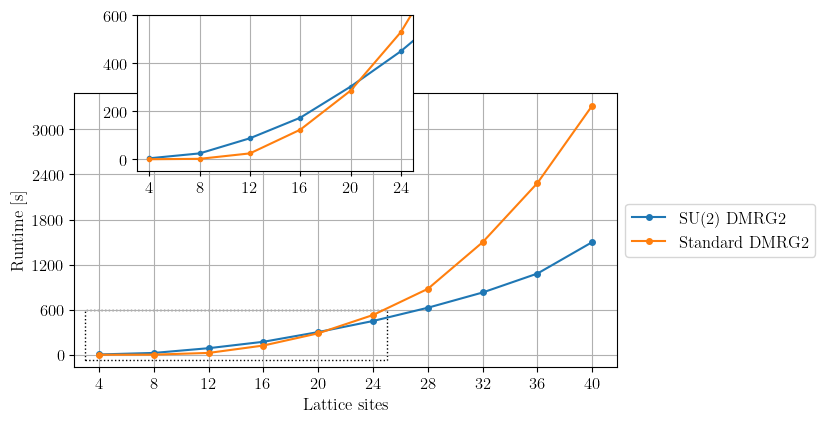

In [164]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

fig, ax = plt.subplots()

# Plot the original data
ax.plot(su2_nsites, su2_runtime, label='SU(2) DMRG2', color='tab:blue', marker='o', markersize=4)
ax.plot(sta_nsites, sta_runtime, label='Standard DMRG2', color='tab:orange', marker='o', markersize=4)

# Add labels and a title
ax.set_ylabel('Runtime [s]')
ax.set_xlabel('Lattice sites')
# ax.set_title('Original Plot with Inset')
ax.set_xticks(range(4, 44, 4))
ax.set_yticks(range(0, 3600, 600))

# Define the position and size of the inset axis
# [x0, y0, width, height] in relative coordinates (0 to 1)
inset_ax = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(-0.48, 0.05, 1.7, 1.9), 
                      bbox_transform=ax.transAxes, loc="center")
# ... height 
# Plot the zoomed-in region on the inset axis
x1, x2, y1, y2 = 3, 25, -75, 600  # Define the region to zoom in on
inset_ax.plot(su2_nsites, su2_runtime, color='tab:blue', marker='o', markersize=3)
inset_ax.plot(sta_nsites, sta_runtime, color='tab:orange', marker='o', markersize=3)

# inset_ax.set_yscale('log')
inset_ax.set_yticks([0, 200, 400, 600])

inset_ax.set_xlim(x1, x2)
inset_ax.set_ylim(-50, y2)
inset_ax.set_xticks(range(4, 25, 4))
# inset_ax.set_yticks(np.linspace(y1, y2, 4))
# Add a rectangular box to indicate the zoomed region
# mark_inset(ax, inset_ax, loc1=2, loc2=4, fc="none", ec="0.5")

rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='black', facecolor='none', linestyle=':')
ax.add_patch(rect)

# Optionally, add grid and labels to inset
inset_ax.grid(True)
# inset_ax.set_xlabel('X axis (inset)')
# inset_ax.set_ylabel('Y axis (inset)')
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Show the plot
fig.savefig('Two-site DMRG Runtime Comparison.pdf', dpi=400, bbox_inches='tight')
plt.show()

### Plot Number of Parameters

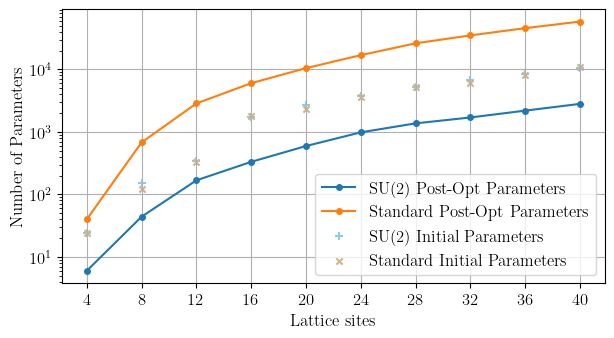

In [180]:
set_plotstyle()
fig, ax = plt.subplots()
ax.plot(su2_nsites, su2_post_opt_paras, label='SU(2) Post-Opt Parameters', color='tab:blue', marker='o', markersize=4)
ax.plot(sta_nsites, sta_post_opt_paras, label='Standard Post-Opt Parameters', color='tab:orange', marker='o', markersize=4)

ax.scatter(su2_nsites, su2_initial_paras, label='SU(2) Initial Parameters', color='skyblue', marker="+", s=35)
ax.scatter(su2_nsites, sta_initial_paras, label='Standard Initial Parameters', color='tan', marker="x", s=20)

ax.set_xticks(range(4, 44, 4))

ax.set_yscale('log')
ax.grid()

ax.set_ylabel('Number of Parameters')
ax.set_xlabel('Lattice sites')

ax.legend(loc='lower right')
fig.savefig('Two-site DMRG Parameter Comparison.pdf', dpi=400, bbox_inches='tight')
plt.show()